410921202 資工四 林芷萱 0529 Practice

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 用cv2.HOGDescriptor()偵測行人
def detect_pedestrian(hog, frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    locations, _ = hog.detectMultiScale(gray, winStride=(8,8), padding=(8,8), scale=1.05)
    return locations

def draw_rectangles(frame, locations, color):
    for (x, y, w, h) in locations:
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

cap = cv2.VideoCapture("wiiplay.mp4")
cap.set(cv2.CAP_PROP_POS_FRAMES, 19400)
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# 在第一幀偵測行人
ret, frame = cap.read()
locations = detect_pedestrian(hog, frame)
draw_rectangles(frame, locations, (0, 0, 255))  # 用紅色長方形

# 初始化trackers
trackers = []
for (x, y, w, h) in locations:
    tracker = cv2.TrackerMIL_create()
    tracker.init(frame, (x, y, w, h))
    trackers.append(tracker)

# cv2.imshow('First Frame with Initial Detection', frame)
cv2.waitKey(0)

start_frame = 19400
end_frame = 20000

cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    frame_seq = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
    if frame_seq > end_frame:
        break
    
    # 追蹤偵測到的行人
    for tracker in trackers:
        success, bbox = tracker.update(frame)
        if success:
            (x, y, w, h) = [int(v) for v in bbox]
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)  # 用紅色長方形

    locations = detect_pedestrian(hog, frame)
    draw_rectangles(frame, locations, (0, 255, 0))  # 用綠色長方形

    cv2.imshow('output', frame)
    if cv2.waitKey(1) == 27:
        break

cap.release()
cv2.destroyAllWindows()

這是第一幀紀錄的偵測:  
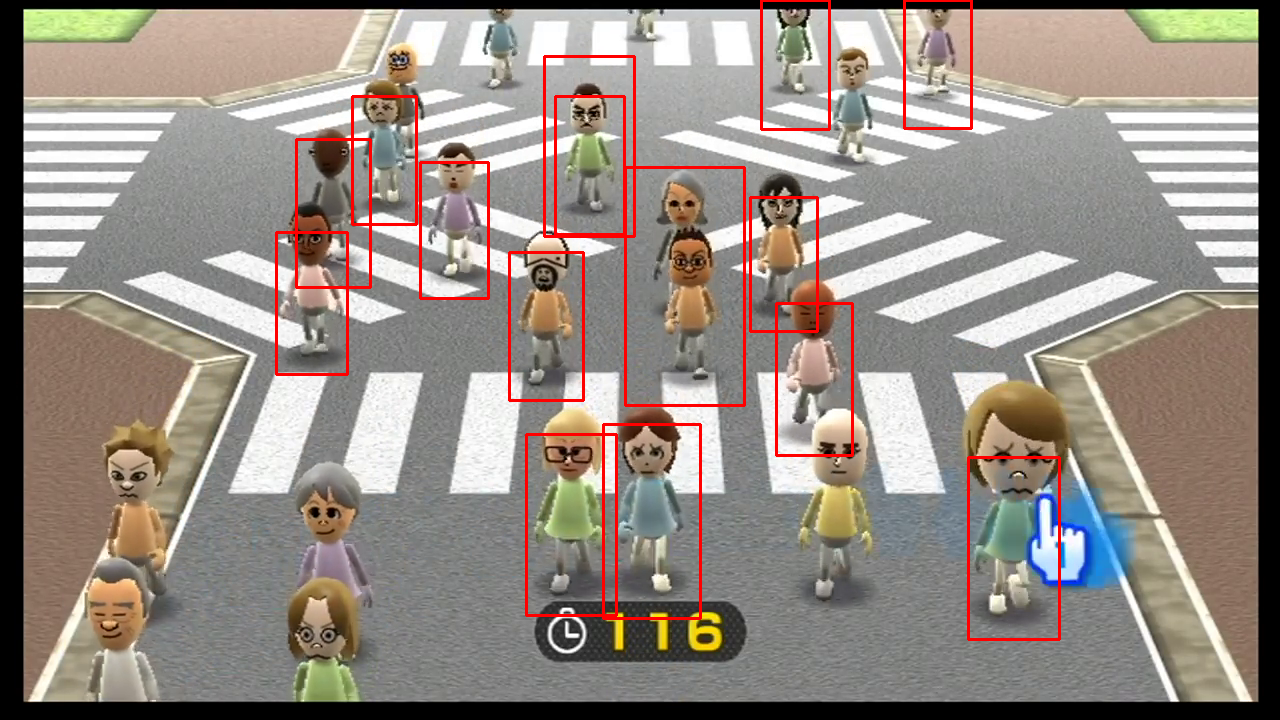

這是其中一幀的偵測:
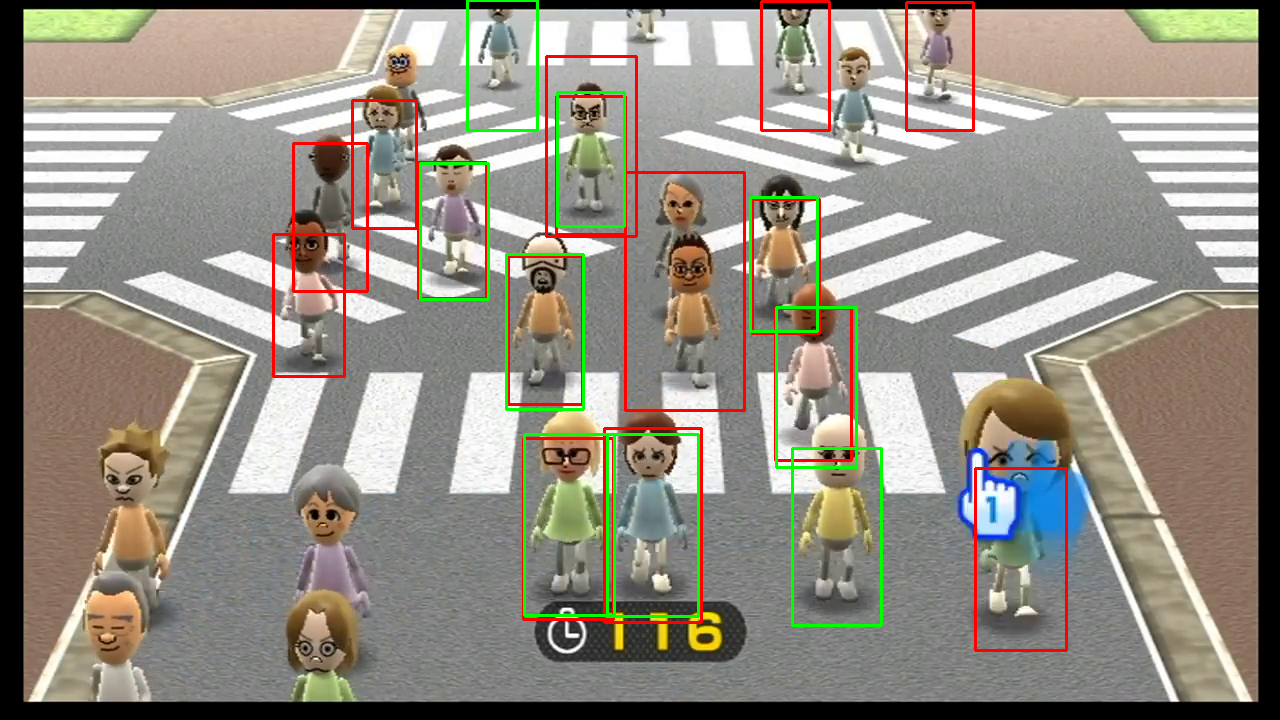